<a href="https://colab.research.google.com/github/bogus1aw/text-classification-benchmark/blob/main/M_TD_IDF_wiki_34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF benchmark for wiki dataset https://clarin-pl.eu/dspace/handle/11321/738

gdrive mounted manually form GUI

In [8]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

1. Load corpus 

In [9]:
fig_path = '/content/drive/MyDrive/figures/'

# raw corpora
# corpora = '/content/drive/MyDrive/master_datasets/wiki_preprocessed/wikiInOneFileDataset.txt'
# save_heat_map_path = fig_path + 'wiki_tfidf_classfiers_features_number_heatmap.svg'
# lemmatized corpora
corpora = '/content/drive/MyDrive/master_datasets/wiki_preprocessed/wikiInOneFileDataset_lemmas.txt'
save_heat_map_path = fig_path + 'wiki_tfidf_classfiers_features_number_heatmap_lemmas.svg'

In [10]:
data = open(corpora).read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# create a dataframe using texts and lables
trainDF = pandas.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels

In [11]:
# split the dataset into training and validation datasets
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF['text'], trainDF['label'])

In [12]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [13]:
def calculate_feature_vectors_tfifd(max_features):
  # word level tf-idf
  tfidf_vect = TfidfVectorizer(analyzer='word', max_features=max_features)
  tfidf_vect.fit(trainDF['text']) 
  xtrain_tfidf =  tfidf_vect.transform(train_x)
  xvalid_tfidf =  tfidf_vect.transform(valid_x)
  # ngram level tf-idf 
  tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(1,2 ), max_features=max_features)
  tfidf_vect_ngram.fit(trainDF['text'])
  xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
  xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)
  return xtrain_tfidf, xvalid_tfidf, xtrain_tfidf_ngram, xvalid_tfidf_ngram

In [14]:
def clasification_benchmark(txt, classifier, feature_vector_train, feature_vector_valid):
  classifier.fit(feature_vector_train, train_y)
  predictions = classifier.predict(feature_vector_valid)
  accuracy = metrics.accuracy_score(valid_y, predictions)
  print(txt, ' ', ac)
  return accuracy

In [15]:
feature_no_list = [1000, 5000, 10000, 15000, 20000, 40000]
# feature_no_list = {1000}
accuracy_matrix = []

for max_feature in feature_no_list:
  print(max_feature)
  xtrain_tfidf, xvalid_tfidf, xtrain_tfidf_ngram, xvalid_tfidf_ngram = calculate_feature_vectors_tfifd(max_feature)
  acc_list = []
  acc_list.append(clasification_benchmark('NB,  word,      ', naive_bayes.MultinomialNB(), xtrain_tfidf, xvalid_tfidf)) 
  acc_list.append(clasification_benchmark('NB,  (1-2)grams ', naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, xvalid_tfidf_ngram)) 
  acc_list.append(clasification_benchmark('SVM, word,      ', svm.SVC(), xtrain_tfidf, xvalid_tfidf)) 
  acc_list.append(clasification_benchmark('SVM, (1-2)grams ', svm.SVC(), xtrain_tfidf_ngram, xvalid_tfidf_ngram)) 
  acc_list.append(clasification_benchmark('LR, word,       ', linear_model.LogisticRegression(), xtrain_tfidf, xvalid_tfidf)) 
  acc_list.append(clasification_benchmark('LR, (1-2)gram   ', linear_model.LogisticRegression(), xtrain_tfidf_ngram, xvalid_tfidf_ngram))
  accuracy_matrix.append(acc_list)

1000
NB,  word,         0.8222996515679443
NB,  (1-2)grams    0.8176538908246226
SVM, word,         0.8600464576074333
SVM, (1-2)grams    0.8548199767711963
LR, word,          0.8693379790940766
LR, (1-2)gram      0.8588850174216028
5000
NB,  word,         0.8641114982578397
NB,  (1-2)grams    0.8629500580720093
SVM, word,         0.9076655052264808
SVM, (1-2)grams    0.9012775842044135
LR, word,          0.908246225319396
LR, (1-2)gram      0.9041811846689896
10000
NB,  word,         0.8739837398373984
NB,  (1-2)grams    0.8710801393728222
SVM, word,         0.9111498257839721
SVM, (1-2)grams    0.9070847851335656
LR, word,          0.9157955865272939
LR, (1-2)gram      0.9117305458768873
15000
NB,  word,         0.8734030197444832
NB,  (1-2)grams    0.8734030197444832
SVM, word,         0.9123112659698026
SVM, (1-2)grams    0.90534262485482
LR, word,          0.9152148664343787
LR, (1-2)gram      0.9117305458768873
20000
NB,  word,         0.8681765389082462
NB,  (1-2)grams    0.8734

In [16]:
df = pandas.DataFrame(accuracy_matrix, 
                      columns=('NB,  word,      ', 'NB,  (1-2)grams ', 'SVM, word,      ', 'SVM, (1-2)grams ', 'LR, word,       ', 'LR, (1-2)gram   '),
                      index=feature_no_list)
df

,"NB, word,","NB, (1-2)grams","SVM, word,","SVM, (1-2)grams","LR, word,","LR, (1-2)gram"
1000,0.822300,0.817654,0.860046,0.854820,0.869338,0.858885
5000,0.864111,0.862950,0.907666,0.901278,0.908246,0.904181
10000,0.873984,0.871080,0.911150,0.907085,0.915796,0.911731
15000,0.873403,0.873403,0.912311,0.905343,0.915215,0.911731
20000,0.868177,0.873403,0.909988,0.908246,0.915215,0.911150
40000,0.867015,0.872822,0.907085,0.907666,0.913473,0.912311


Text(105.0, 0.5, 'No. of features')

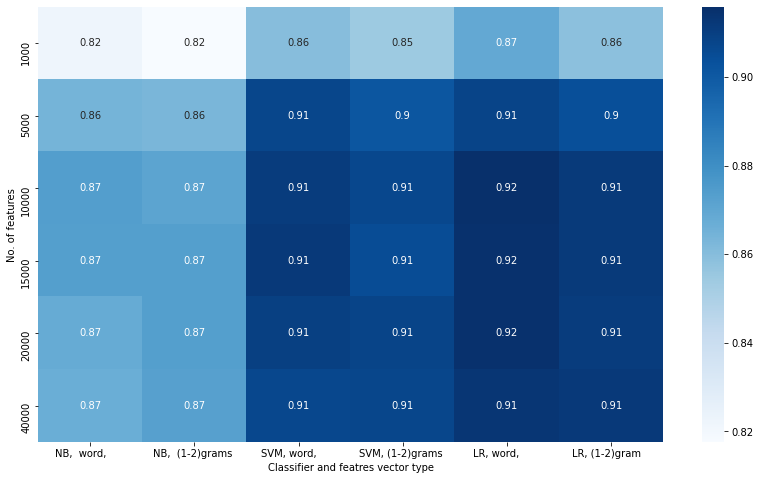

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))

sns.heatmap(df, annot=True, cmap="Blues")
            # xticklabels=category_id_df.Product.values, 
            # yticklabels=category_id_df.Product.values)
# sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
#             xticklabels=category_id_df.Product.values, 
#             yticklabels=category_id_df.Product.values)
plt.savefig(save_heat_map_path)
plt.xlabel('Classifier and featres vector type')
plt.ylabel('No. of features')

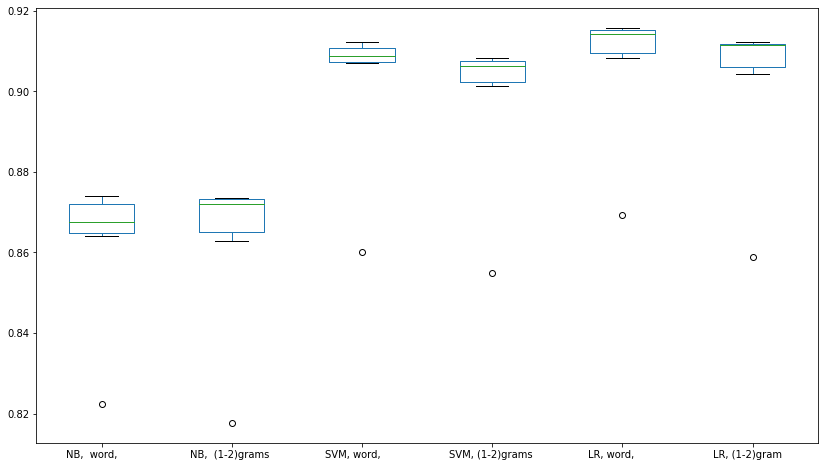

In [26]:
df.plot.box(figsize=(14,8))

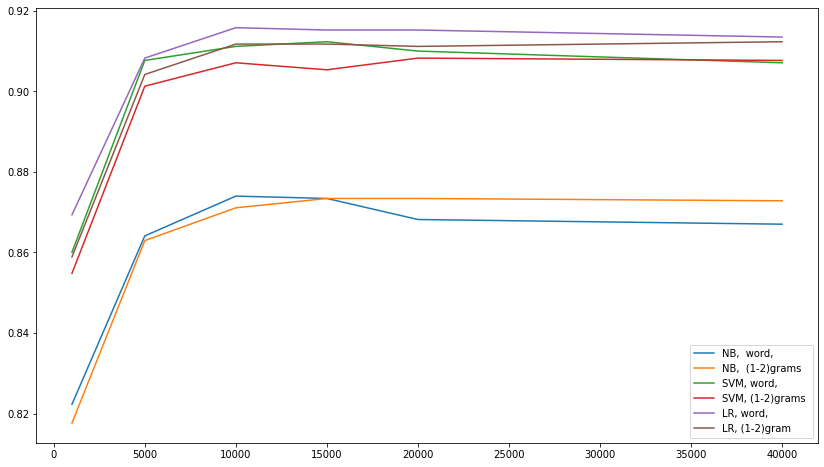

In [31]:
df.plot.line(figsize=(14,8))